In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
salary_df=pd.read_csv("Salary_Data.csv")


In [8]:
data_shallow = salary_df

In [9]:
data_shallow

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [10]:
salary_df.head(7)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0


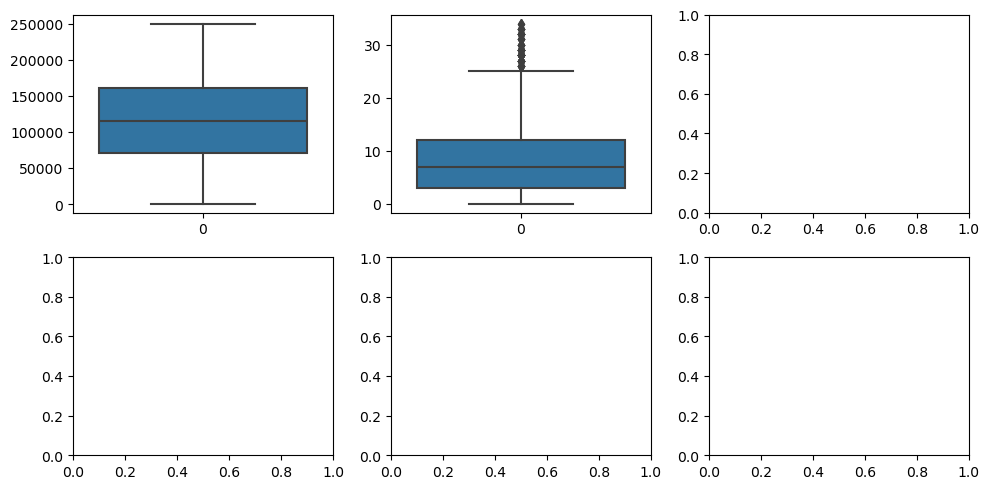

In [12]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data_shallow['Salary'], ax = axs[0,0])
plt2 = sns.boxplot(data_shallow['Years of Experience'], ax = axs[0,1])
plt.tight_layout()

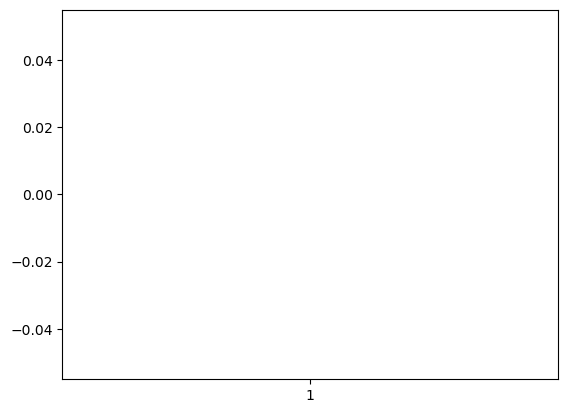

In [13]:
# outlier treatment for Salary
plt.boxplot(salary_df.Salary)
Q1 = salary_df.Salary.quantile(0.25)
Q3 = salary_df.Salary.quantile(0.75)
IQR = Q3 - Q1
salary = salary_df[(salary_df.Salary >= Q1 - 1.5*IQR) & (salary_df.Salary <= Q3 + 1.5*IQR)]

In [14]:
salary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [ ]:
# 1. Convert the data object into numerical values for model building
# 2. label encoder --> convert the data
# 3. split the dataset into X,y
# 4. features_importances

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import category_encoders as ce

In [17]:
salary_final=salary.drop(columns="Gender")
salary_final

,Age,Education Level,Job Title,Years of Experience,Salary
0,32.0,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Master's,Data Analyst,3.0,65000.0
2,45.0,PhD,Senior Manager,15.0,150000.0
3,36.0,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Master's,Director,20.0,200000.0
...,...,...,...,...,...
6699,49.0,PhD,Director of Marketing,20.0,200000.0
6700,32.0,High School,Sales Associate,3.0,50000.0
6701,30.0,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Master's Degree,Marketing Manager,14.0,140000.0


In [ ]:
# split into X and y 

In [18]:
X=salary_final.drop(columns="Salary")
y=salary_final["Salary"] # target 

In [19]:
X.info()
# independent variable 

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6699 non-null   float64
 1   Education Level      6698 non-null   object 
 2   Job Title            6699 non-null   object 
 3   Years of Experience  6699 non-null   float64
dtypes: float64(2), object(2)
memory usage: 261.7+ KB


In [20]:
salary_final

,Age,Education Level,Job Title,Years of Experience,Salary
0,32.0,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Master's,Data Analyst,3.0,65000.0
2,45.0,PhD,Senior Manager,15.0,150000.0
3,36.0,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Master's,Director,20.0,200000.0
...,...,...,...,...,...
6699,49.0,PhD,Director of Marketing,20.0,200000.0
6700,32.0,High School,Sales Associate,3.0,50000.0
6701,30.0,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Master's Degree,Marketing Manager,14.0,140000.0


In [ ]:
# split into X and y 

In [11]:
X=salary_final.drop(columns="Salary")
y=salary_final["Salary"] # target

In [12]:
X.info()
# independent variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
dtypes: float64(1)
memory usage: 372.0 bytes


In [22]:
encoder = ce.LeaveOneOutEncoder()
x=encoder.fit_transform(X,y)

In [23]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6699 non-null   float64
 1   Education Level      6699 non-null   float64
 2   Job Title            6699 non-null   float64
 3   Years of Experience  6699 non-null   float64
dtypes: float64(4)
memory usage: 261.7 KB


In [24]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20)

In [25]:
model_rfr = RandomForestRegressor(n_estimators=7)
model_dt = DecisionTreeRegressor()
model_lr = LinearRegression()

In [26]:
models = [model_rfr,model_dt,model_lr]

In [27]:
for model in models :
    print(f"fitting model: {model}")
    model.fit(x_train,y_train)

fitting model: RandomForestRegressor(n_estimators=7)
fitting model: DecisionTreeRegressor()
fitting model: LinearRegression()


In [28]:
for model in models:
    print(f"score of {model} for training data: {model.score(x_train,y_train)}")

score of RandomForestRegressor(n_estimators=7) for training data: 0.9983277017275888
score of DecisionTreeRegressor() for training data: 1.0
score of LinearRegression() for training data: 0.8060634415277079


In [29]:
for model in models:
    print(f"score of {model} for testing data: {model.score(x_test,y_test)}")

score of RandomForestRegressor(n_estimators=7) for testing data: 0.9926105225659257
score of DecisionTreeRegressor() for testing data: 0.988094148895749
score of LinearRegression() for testing data: 0.8132631069647053


In [30]:
fs = model_rfr.feature_importances_
feature_names = x.columns

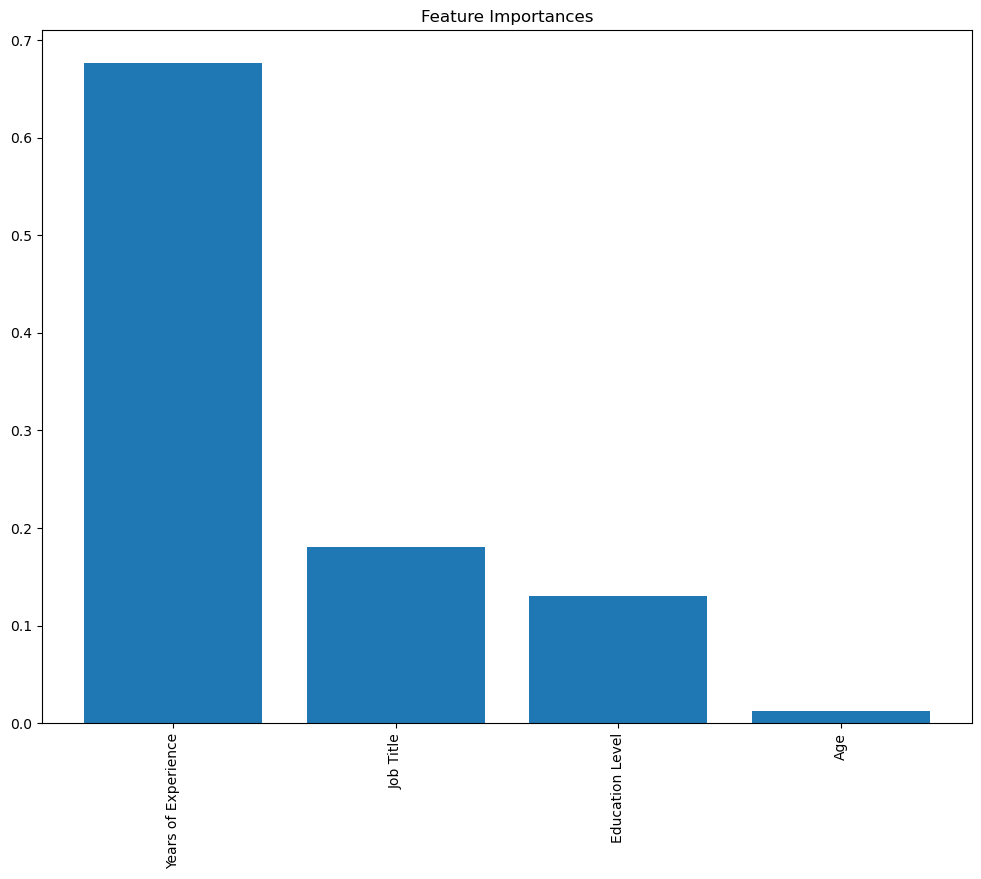

In [31]:
feature_importances = pd.DataFrame(fs,feature_names).sort_values(by=0,ascending=False)
plt.figure(figsize=(12, 9))
plt.title("Feature Importances")
plt.bar(x=feature_importances.index,height=feature_importances[0])
plt.xticks(rotation=90)
plt.show()

In [32]:
feature_importances

,0
Years of Experience,0.676248
Job Title,0.180720
Education Level,0.130114
Age,0.012918


In [ ]:
# train and test using top 5 features 

In [33]:
def regression_results(y_true, y_pred):
    # Regression metrics
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred) 
    mse = metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error = None
    
    # Handling negative values
    if (y_true >= 0).all() and (y_pred >= 0).all():
        mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)

    r2 = metrics.r2_score(y_true, y_pred)

    results = {
        'r2': round(r2, 4),
        'MAE': round(mean_absolute_error, 4),
        'MSE': round(mse, 4),
        'RMSE': round(np.sqrt(mse), 4),
        'mean_squared_log_error': round(mean_squared_log_error, 4) if mean_squared_log_error is not None else "N/A"
    }
    
    return results

for model in models:
    y_predicted = model.predict(x_test)

    print(f"Report: {model}")
    results = regression_results(y_test, y_predicted)
    for metric, value in results.items():
        print(f'{metric}: {value}')
    print("\n")

Report: RandomForestRegressor(n_estimators=7)
r2: 0.9926
MAE: 1092.8578
MSE: 20450194.5521
RMSE: 4522.1891
mean_squared_log_error: 0.0154


Report: DecisionTreeRegressor()
r2: 0.9881
MAE: 930.4925
MSE: 32949146.0746
RMSE: 5740.1347
mean_squared_log_error: 0.0305


Report: LinearRegression()
r2: 0.8133
MAE: 16805.6633
MSE: 516789695.4418
RMSE: 22733.0089
mean_squared_log_error: 0.0583


